In [1]:
!pip install GDAL
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import math
import heapq
# from google.colab import drive
# drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Transmission')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
ls

LICENSE             __pycache__/        testOutUtils.ipynb
README.md           geograph.py


In [4]:
import geograph

/Users/williamrosenbluth/anaconda3/lib/python3.11/site-packages/osgeo/gdal.py:290: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


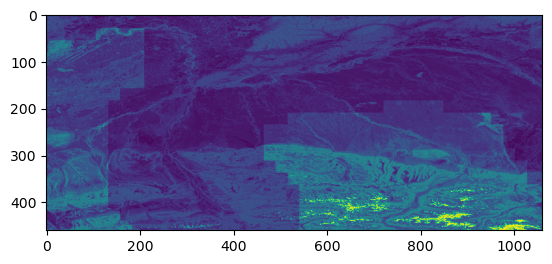

(-149.97104173790177, 0.0026949458523585646, 0.0, 64.98322933792207, 0.0, -0.0026949458523585646)


In [6]:
friction, frictionGeotransform = geograph.readFrictionTiff('Example_Files/FbxToHealyFrictionMap.tif')
plt.imshow(friction)
plt.show()
print(frictionGeotransform)

In [7]:
print(type(friction))

<class 'numpy.ndarray'>


Initialize the rastergraph datastructure

In [8]:
myGraph = geograph.RasterGraph(friction, frictionGeotransform)

Dijkstra's algorithm can be run all at once

In [14]:
CCarr, pathInfo = myGraph.dijkstrasAlgorithm(((150,500),), (300, 275))
path = pathInfo[0]
length = pathInfo[1]
tree = pathInfo[2]


Or it can be run as two separate functions to build the costmap and trace the path

In [15]:
split_cost = myGraph.buildCumulativeCost(((150,500),))
split_path = myGraph.tracebackPath(tree, (300, 275))

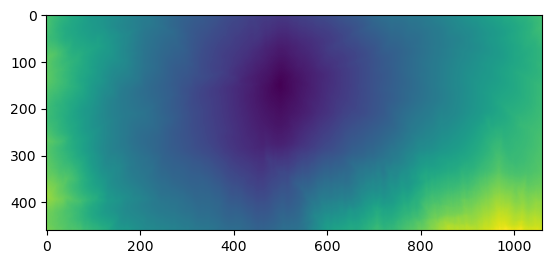

In [16]:
plt.imshow(CCarr)

In [19]:
pathArr = myGraph.pathToArray(path, width=1)
widePathArr = myGraph.pathToArray(path, width=3)

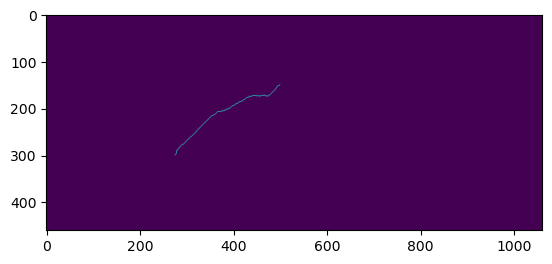

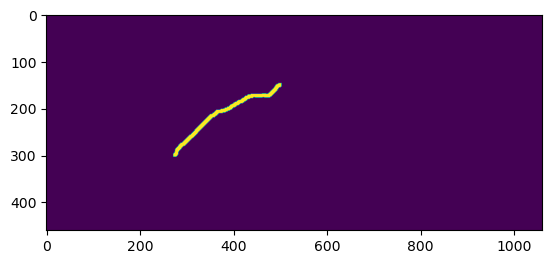

In [20]:
plt.imshow(pathArr)
plt.show()
plt.imshow(widePathArr)